Most of this Notebook was prepared with Google Colab. The URLs to file locations on Google Drive can be replaced by the local file path. i.e. `/content/drive/MyDrive/output/train_complete.csv` should be substituted with `../output/train_complete.csv`

Please note that some files were considered too large for Git and are not available.

## Identifying Duplicate Questions

Over 100 million people visit Quora every month, so it's no surprise that many people ask similar (or the same) questions. Various questions with the same intent can cause people to spend extra time searching for the best answer to their question, and results in members answering multiple versions of the same question. Quora uses random forest to identify duplicated questions to provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
Follow the steps outlined below to build the appropriate classifier model. 


Steps:
- Download data
- Exploration
- Cleaning
- Feature Engineering
- Modeling

By the end of this project you should have **a presentation that describes the model you built** and its **performance**. 


# Exploratory Data Analysis

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
pd.set_option('display.max_colwidth', None) # to display full text without truncations

In [3]:
!nvidia-smi -L

/bin/bash: nvidia-smi: command not found


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("data/train.csv")

In [ ]:
# quick data overview
display(df.info())
display(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


None

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


### Exploration

**Checking for Null and Duplicates**. Via `info()`, already identified 3 NULL fields. Will be deleted as they are fractional compared to the entire dataset.

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [6]:
# checking for duplicates 
df.duplicated().sum()

0

In [7]:
display(df[df['is_duplicate']==1].sample(n=5))
df[df['is_duplicate']==0].sample(n=5)

,id,qid1,qid2,question1,question2,is_duplicate
317608,317608,442850,442851,What's the difference between autism and schizoaffective disorder?,Can autism be confused with schizoaffective disorder?,1
337059,337059,58173,10859,How can I improve my English in all aspects?,How can I specifically improve my English?,1
73899,73899,126749,126750,What are the automobile projects related to design and analysis of automobile part?,What are a few automobile projects related to design and analysis of automobile part?,1
224938,224938,333155,193651,What is creamy layer?,What is OBC creamy layer and non creamy layer?,1
322713,322713,4291,84974,What do you think of India’s surgical strikes that took place against terrorists in Pakistan?,What you think about recent India's surgical strike in Pakistan?,1


,id,qid1,qid2,question1,question2,is_duplicate
242023,242023,354146,124573,How can you stop hairs from growing in your anus?,How can I stop my hair from growing?,0
217678,217678,324094,324095,Who said that quiet people have the loudest minds? I keep hearing either Stephen Hawking or Stephen King.,Do Stephen Hawkings' children have ALS?,0
1155,1155,2302,2303,Walking 3 km daily for 60 days will lead to how much weight loss?,How do I lose weight and gain muscle?,0
308103,308103,431890,14376,What are good ways for an engineer to measure their own productivity?,Can you see who views your Instagram?,0
282618,282618,402587,402588,What is the most efficient sorting algorithm for finding largest number among 20 numbers?,How do you write an algorithm to find the sum of the first 50 numbers?,0


In [10]:
# checking for class imbalances
display(df['is_duplicate'].value_counts())
df['is_duplicate'].value_counts()[0]/df['is_duplicate'].value_counts()[1]

0    255024
1    149263
Name: is_duplicate, dtype: int64

1.7085546987532074

**Observations**: 

There's no designated test.csv file so a subsection of the train.csv will be set aside early to avoid leaking.

There's a significant class imbalance that should be handled prior to model training.


**Important**: archived code. **Do not run** again or will over-write important data.
```python
# creating test_df hold out
test_df = df.sample(frac=0.2, random_state=88)
filter = df.index.isin(test_df.index.tolist())
train_df = df[~filter]
# checking for intersection
set (train_df.index) & set(test_df.index) # should be empty to pass
train_df.to_csv('output/train_df.csv',index=False, header=False)
test_df.to_csv('output/test_df.csv', index=False, header=False)
```

In [7]:
train_df = pd.read_csv('/content/drive/MyDrive/output/train_df.csv')
test_df = pd.read_csv('/content/drive/MyDrive/output/test_df.csv')
train_df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
2,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


# Preprocessing

- Tokenization
- Stopwords cleaning
- Removing punctuation
- Normalizing
- Stemming

In [1]:
import nltk
nltk.download('stopwords')
import string

from nltk.corpus import stopwords
stopwords_eng = stopwords.words('english')

from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize # to get other parts of speach

import spacy
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
len(train_df) # this is important!

323430

In [8]:
# sample text for testing
text = train_df['question1'][:3]
text

0              What is the step by step guide to invest in share market in india?
1       How can I increase the speed of my internet connection while using a VPN?
2    Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
Name: question1, dtype: object

In [9]:
def preprocessing (documents, returnlist=True):
  """
  Receives a list of documents, 
  does preprocessing on the text (strip punctuation, lemming, etc)
  and tokenizes (splits) the text
  can return a list of lists or a lists of sentences depending on the setting
  """
  cleaned_documents = []
  for text in documents:
    # lower case
    text = text.lower()
    # stopwords clearning
    stopwords = stopwords_eng
    text = " ".join([word for word in text.split() if word not in stopwords_eng])
    
    # removing punctuation
    punctuation = string.punctuation
    text = "".join([char for char in list(text) if char not in string.punctuation])

    # normalizing
    text = nlp(text)

    # lemming & tokenize
    text = [token.lemma_ for token in text]
    text = text if returnlist else " ".join(text)
    
    cleaned_documents.append(text)
    
  return cleaned_documents

    
preprocessing(text) # test

[['step', 'step', 'guide', 'invest', 'share', 'market', 'india'],
 ['increase', 'speed', 'internet', 'connection', 'use', 'vpn'],
 ['one',
  'dissolve',
  'water',
  'quikly',
  'sugar',
  'salt',
  'methane',
  'carbon',
  'di',
  'oxide']]

# Feature Engineering with Gensim `Doc2Vec`
https://radimrehurek.com/gensim/models/doc2vec.html

`doc2vec` is a paragraph embedder - turns greater than word length text to high-dimensional vectors, and maps their semantic relationship in dynamic space. 
- Therefore, the cosine distance between the texts-as-vectors can be a measure of their semantic difference. 
- Strategy: vectorize each text with doc2vec, derive cosine difference and use as a feature.

Process:
0. Preprocess `train_df['question_1']` and `['question']` with the preprocessing function above. 
1. Build the corpus from the train_df dataset (the model is untrained).
2. Train the model on the train_df dataset.
3. Save the model.
4. Vectorize the preprocessed features with `infer_vector`.
5. Calculate `cosine_similarity` feature.

### Building the Corpus

In [ ]:
# 0. preprocessing the texts
preprocessed_train_q1 = preprocessing(train_df['question1'])
preprocessed_train_q2 = preprocessing(train_df['question2'])


In [ ]:
# 1. build the vocabulary/corpus from the texts
import gensim
training_texts = preprocessed_train_q1 + preprocessed_train_q2
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
train_corpus = [TaggedDocument(doc, [i]) for i, doc in enumerate(training_texts)]

### Training the model

(array([3.86092e+05, 2.08353e+05, 4.50280e+04, 5.57000e+03, 1.36400e+03,
        3.30000e+02, 7.70000e+01, 1.90000e+01, 4.00000e+00, 2.00000e+00,
        4.00000e+00, 3.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.20000e+01]),
 array([  0. ,   5.5,  11. ,  16.5,  22. ,  27.5,  33. ,  38.5,  44. ,
         49.5,  55. ,  60.5,  66. ,  71.5,  77. ,  82.5,  88. ,  93.5,
         99. , 104.5, 110. ]),
 <BarContainer object of 20 artists>)

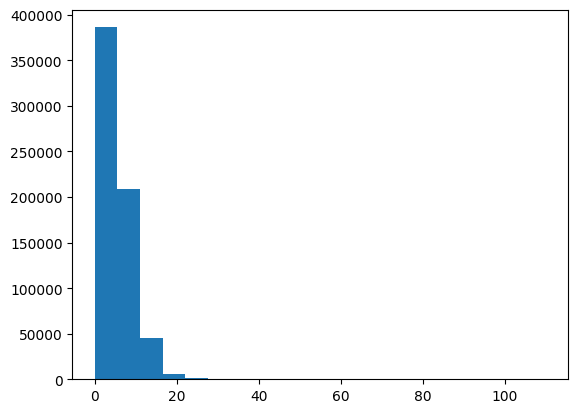

In [ ]:
# determine vector size based on the average/median word count in each row
# plot histogram to see word count distribution
length_of_text = []
for text in (preprocessed_train_q1 + preprocessed_train_q2):
  length_of_text.append(len(text))
plt.ylabel = "frequency"
plt.xlabel = "word count"
plt.hist(length_of_text, bins=20)

Based on the above, 30 is an appropriate vector size

In [ ]:
# instantiate the model
model = Doc2Vec(vector_size=30, min_count=2, epochs=40)
# build the vocabulary
model.build_vocab(train_corpus)
# train the model on the corpus
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

### Saving the model

```python
# do not run this cell or you will overwrite the model
model.save("model/d2v.model")
model_ = Doc2Vec.load("model/d2v.model")
model_
```

### Vectorizing the texts

In [ ]:
# vectorizing the data 
def doc2vectorization(df):
  """
  input: list of list of words
  output: vectors
  """
  vectors = []
  sentences = df.copy()
  for sentence in sentences:
    vector = model_.infer_vector(sentence)
    vectors.append(vector)
  return vectors

In [ ]:
q1vector = doc2vectorization(preprocessed_train_q1)
q2vector = doc2vectorization(preprocessed_train_q2)

In [ ]:
# saving documents

pd.DataFrame(preprocessed_train_q1).to_csv('output/preprocessed_train_1.csv', 
                                           index=False, header=False)
pd.DataFrame(preprocessed_train_q2).to_csv('output/preprocessed_train_2.csv', 
                                           index=False, header=False)
pd.DataFrame(q1vector).to_csv('output/q1vector.csv', 
                                           index=False, header=False)
pd.DataFrame(q2vector).to_csv('output/q2vector.csv', 
                                           index=False, header=False)

#### Check point
**continue from here** 
At this point my system crashed because it had used up all the RAM. 

In [ ]:
import pandas as pd
import numpy as np
# reloading data
q1vector = pd.read_csv('output/q1vector.csv')
q2vector = pd.read_csv('output/q2vector.csv')
q1vector_n = np.array(q1vector)
q2vector_n = np.array(q2vector)
# checking shape to confirm. should be 323430 rows
q1vector_n.shape, q2vector_n.shape


((323430, 30), (323430, 30))

### Calculate the Cosine Similarity Feature

In [ ]:
# import cosine similarity 
from sklearn.metrics.pairwise import cosine_similarity
# row-by-row calculation with list concatenation
cos_q1q2 = [cosine_similarity(q1vector_n[i:i+1], q2vector_n[i:i+1]) for i in range(323430)]
cos_q1q2 = np.squeeze(np.array(cos_q1q2))


In [ ]:
cos_q1q2.shape #323430?

(323430,)

**Important**: shape is **`323430`** long

### Vectorizing and creating features for the test data

The above will be repeated for the test data. The test data has to go through the same process as the train data if it will eventually pass through the classifier. However note that like with the convetional 'fit & transform', the test data was not used to build/train the `Doc2Vec` vectorizer. Ideally the vectorizer and preprocessing stages should be part of a pipeline, but they're too computationally expensive to be done 'trivially'. 

In [ ]:
# repeating the steps from processing text to getting cosine distance
preprocessed_test_q1 = preprocessing(test_df['question1'])
preprocessed_test_q2 = preprocessing(test_df['question2'])
q1vector_test = doc2vectorization(preprocessed_test_q1)
q2vector_test = doc2vectorization(preprocessed_test_q2)
q1vector_n_test = np.array(q1vector_test)
q2vector_n_test = np.array(q2vector_test)



In [ ]:
# cosine similarity for the test df
from sklearn.metrics.pairwise import cosine_similarity
cos_q1q2_test = [cosine_similarity(q1vector_n_test[i:i+1], q2vector_n_test[i:i+1]) for i in range(80857)]

In [ ]:
cos_q1q2_test = np.squeeze(np.array(cos_q1q2_test))


In [15]:
# inserting the new features
train_df['cosine_distance'] =  cos_q1q2
test_df['cosine_distance'] = cos_q1q2_test

In [ ]:
# saving
pd.DataFrame(cos_q1q2).to_csv('output/cos_q1q2.csv', 
                                           index=False, header=False)
pd.DataFrame(cos_q1q2_test).to_csv('output/cos_q1q2_test.csv', 
                                           index=False, header=False)
pd.DataFrame(preprocessed_test_q1).to_csv('output/preprocessed_test_1.csv', 
                                           index=False, header=False)
pd.DataFrame(preprocessed_test_q2).to_csv('output/preprocessed_test_2.csv', 
                                           index=False, header=False)
pd.DataFrame(q1vector_test).to_csv('output/q1vector_test.csv', 
                                           index=False, header=False)
pd.DataFrame(q2vector_test).to_csv('output/q2vector_test.csv', 
                                           index=False, header=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Feature Engineering with TF Hub Universal Sentence Encoder

https://tfhub.dev/google/universal-sentence-encoder/4

https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb#scrollTo=BnvjATdy64eR

Like Doc2Vec also maps semantic similarities between longer-than-one-word texts. Unlike Doc2Vec comes with pretrained weights. Can be used as both a feature extractor and as a model/classifier.

Strategy: Use the USE to generate sentence embeddings, and use `np.inner` to calculate the semantic distance between sentences. (Note text should **not** be preprocessed) Generate new feature called `similarity`.

In [ ]:
# install requirements
from absl import logging
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns



In [ ]:
# load the USE embedder
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# embed the train data
train_embeddings = []
for idx in tqdm(train_df.index):
  result = embed([train_df.loc[idx,'question1'],
                  train_df.loc[idx,'question2']])
  embedding = np.inner(result, result)[1][0]
  train_embeddings.append(embedding)
# embed the test data
test_embeddings = []
for idx in tqdm(test_df.index):
  result = embed([test_df.loc[idx,'question1'],
                  test_df.loc[idx,'question2']])
  embedding = np.inner(result, result)[1][0]
  test_embeddings.append(embedding)

100%|██████████| 80857/80857 [10:10<00:00, 132.48it/s]


In [ ]:
# inserting the new features
train_df['similarity'] =  train_embeddings
test_df['similarity'] = test_embeddings

In [ ]:
# saving
pd.DataFrame(train_embeddings).to_csv('/content/drive/MyDrive/output/train_embeddings.csv', index=False)
pd.DataFrame(test_embeddings).to_csv('/content/drive/MyDrive/output/test_embeddings.csv', index=False)

# Feature Engineering - Common Words

Using simple set functionality, we will create a 'common_words' features that gives the ratio of common words between questions.

In [43]:
from tqdm import tqdm
# the function is performed on preprocessed text
# test df
tmp_q1 = preprocessed_test_q1.fillna("")
tmp_q2 = preprocessed_test_q2.fillna("")
test_feature_commonality = []
for idx in tqdm(tmp_q1.index):
  q1 = set(tmp_q1.loc[idx])
  q2 = set(tmp_q2.loc[idx])
  try:
    commonality = len(q1.difference(q2))/len(q1.union(q2))
  except:
    commonality = 0 # catching zero division errors
  test_feature_commonality.append(commonality)

# train df
tmp_q1 = preprocessed_train_q1.fillna("")
tmp_q2 = preprocessed_train_q2.fillna("")
train_feature_commonality = []
for idx in tqdm(range(len(tmp_q1))):
  q1 = set(tmp_q1.loc[idx])
  q2 = set(tmp_q2.loc[idx])
  try:
    commonality = len(q1.difference(q2))/len(q1.union(q2))
  except:
    commonality = 0
  train_feature_commonality.append(commonality)

# reshaping to avoid a problem passing into the model
train_feature_commonality = np.array(train_feature_commonality).reshape(-1,1)
test_feature_commonality = np.array(test_feature_commonality).reshape(-1,1)


100%|██████████| 323430/323430 [00:45<00:00, 7115.99it/s]


In [44]:
train_df['common_words'] = train_feature_commonality
test_df['common_words'] = test_feature_commonality

In [ ]:
train_df['cosine_distance'] =  pd.read_csv('/content/drive/MyDrive/output/cos_q1q2.csv',
                        header=None)
test_df['cosine_distance'] = pd.read_csv('/content/drive/MyDrive/output/cos_q1q2_test.csv',
                            header=None)

# Statistical Analysis
Checking the features with visualizations and statistical tests to see if they are statistically significant i.e. have any value to the model.

In [28]:
import seaborn as sns
from scipy.stats import f_oneway

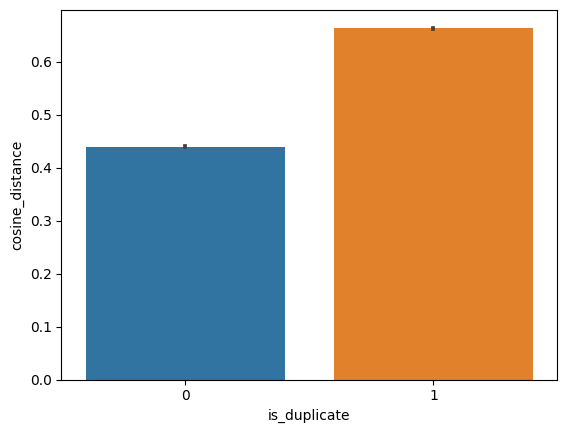

0.0

cosine_distance and is_duplicate are possibly correlated.


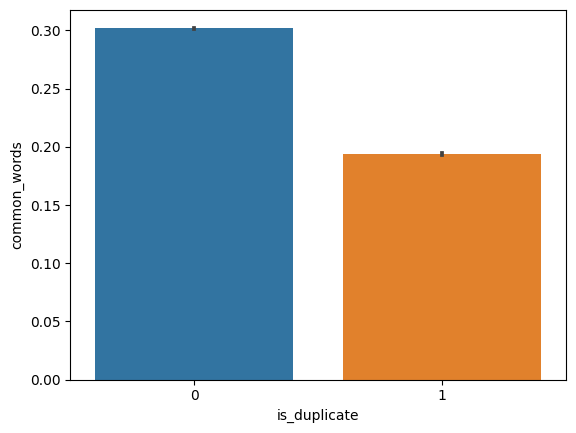

0.0

common_words and is_duplicate are possibly correlated.


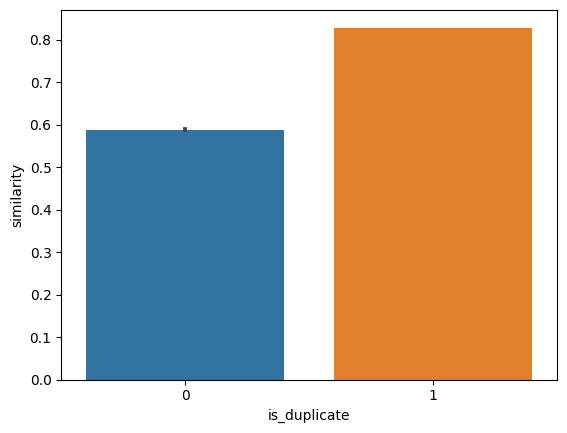

0.0

similarity and is_duplicate are possibly correlated.


In [30]:
for col in ['cosine_distance', 'common_words', 'similarity']:

  sns.barplot(data=train_df, x='is_duplicate', y=col)
  plt.show()


  catgroup = train_df.groupby('is_duplicate')[col].apply(list)
  p = f_oneway(*catgroup)[1]
  display(p)
  print (f"{col} and is_duplicate are possibly",
            "correlated." if p<0.05 else "not correlated.")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


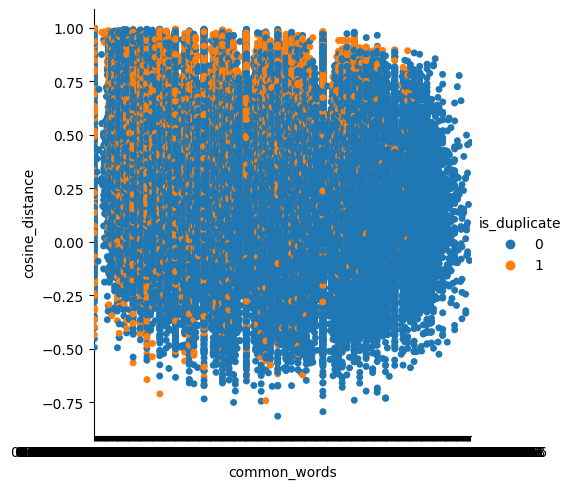

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


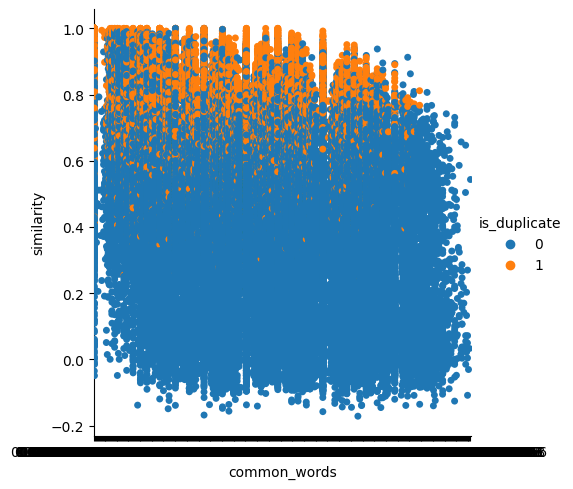

In [ ]:
# Viewing catplot to see spread of 'is_duplicate' between dimensions

sns.catplot(data=train_df, x="common_words", y="cosine_distance", hue="is_duplicate")
plt.show()
sns.catplot(data=train_df, x="common_words", y="similarity", hue="is_duplicate")
plt.show()
sns.catplot(data=train_df, x="similarity", y="cosine_distance", hue="is_duplicate")
plt.show()

In [39]:
import statsmodels.api as sm

# running statsmodel log_reg to check the p-values of the features
   
Y = train_df['is_duplicate'][:].copy()
X = train_df[['cosine_distance', 'common_words', 'similarity']][:].copy()
X = sm.add_constant(X)

log_reg = sm.Logit(Y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.490929
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           is_duplicate   No. Observations:               323430
Model:                          Logit   Df Residuals:                   323426
Method:                           MLE   Df Model:                            3
Date:                Wed, 07 Jun 2023   Pseudo R-squ.:                  0.2545
Time:                        02:53:16   Log-Likelihood:            -1.5878e+05
converged:                       True   LL-Null:                   -2.1300e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -6.8851      0.035   -194.935      0.000      -6.954      -6.816
cosine_distanc

###Conclusions:
There is visible and measurable statistical significance between the new features and the target variable. 

# Checkpoint

I created this check point because of the frequent service interruptions. You can start running the notebook from here. All the needed parameters will be reloaded from where they were saved.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
display(train_df.head(2))
display(test_df.head(2))
len(train_df), len(test_df)

,id,qid1,qid2,question1,question2,is_duplicate,cosine_distance,similarity,common_words
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,0.973016,0.936438,0.142857
1,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,0.495347,0.609381,0.333333


,id,qid1,qid2,question1,question2,is_duplicate,cosine_distance,similarity,common_words
0,274201,184139,392790,"I have girlfriend and their parents accepted for my marriage, I m working in Nagpur but her parents wanted me to shift Bangalore? Is it valid wish?",What are the approximate cutoffs through GMAT and XAT for XLRI GMP for executives with over 5 years experience?,0,-0.065643,0.159054,0.5
1,371396,17738,282735,How can I improve at chess?,How do I improve chess playing?,1,0.849161,0.920271,0.0


(323430, 80857)

In [61]:
train_df.to_csv('/content/drive/MyDrive/output/train_complete.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/output/test_complete.csv', index=False)

In [62]:
pd.read_csv('/content/drive/MyDrive/output/train_complete.csv') # testing

,id,qid1,qid2,question1,question2,is_duplicate,cosine_distance,similarity,common_words
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,0.973016,0.936438,0.142857
1,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,0.495347,0.609381,0.333333
2,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,0.391109,0.335715,0.571429
3,6,13,14,Should I buy tiago?,What keeps childern active and far from phone and video games?,0,0.168122,0.016591,0.200000
4,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,0.812078,0.909070,0.250000
...,...,...,...,...,...,...,...,...,...
323425,404285,433578,379845,How many keywords are there in the Racket programming language of the latest version?,How many keywords are there in PERL Programming Language in the latest version?,0,0.534288,0.757957,0.111111
323426,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,0.876653,0.904780,0.200000
323427,404287,537928,537929,What is one coin?,What's this coin?,0,0.781681,0.794427,0.200000
323428,404288,537930,537931,"What is the approx annual cost of living while studying in UIC Chicago, for an Indian student?","I am having little hairfall problem but I want to use hair styling product. Which one should I prefer out of gel, wax and clay?",0,-0.254688,0.131100,0.391304


This ends EDA and Feature Engineering. You can go to the Machine Learning notebook or the Deep Learning notebook.